# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#print check
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

5dd10aa9a5694fc40638c2b8d611c921


ModuleNotFoundError: No module named 'citipy'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}'
    response = requests.get(city_url)
    data = response.json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = data['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country'] 
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nantucket
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | vorkuta
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | takamaka
City not found. Skipping...
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | yung shue wan
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | us

Processing Record 39 of Set 4 | san patricio
Processing Record 40 of Set 4 | jianshui
Processing Record 41 of Set 4 | tshabong
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | chandler
Processing Record 44 of Set 4 | candon
Processing Record 45 of Set 4 | loiza
Processing Record 46 of Set 4 | fada
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | am djarass
City not found. Skipping...
Processing Record 49 of Set 4 | camapua
Processing Record 0 of Set 5 | san antonio de pale
Processing Record 1 of Set 5 | toga village
City not found. Skipping...
Processing Record 2 of Set 5 | tokar
Processing Record 3 of Set 5 | xining
Processing Record 4 of Set 5 | mogadishu
Processing Record 5 of Set 5 | elliot lake
Processing Record 6 of Set 5 | itacare
Processing Record 7 of Set 5 | nar'yan-mar
Processing Record 8 of Set 5 | iwanai
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 | san pedro
Processing Record 11 of Set

Processing Record 30 of Set 8 | afaahiti
Processing Record 31 of Set 8 | tofol
Processing Record 32 of Set 8 | chibougamau
Processing Record 33 of Set 8 | montelibano
Processing Record 34 of Set 8 | sumbawa besar
Processing Record 35 of Set 8 | shahrud
Processing Record 36 of Set 8 | hilo
Processing Record 37 of Set 8 | shawinigan
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | pacific grove
Processing Record 40 of Set 8 | okahao
Processing Record 41 of Set 8 | colonia
Processing Record 42 of Set 8 | khor
Processing Record 43 of Set 8 | acapulco de juarez
Processing Record 44 of Set 8 | emerald
Processing Record 45 of Set 8 | agulu
Processing Record 46 of Set 8 | maxixe
Processing Record 47 of Set 8 | cooper's town
Processing Record 48 of Set 8 | wicklow
Processing Record 49 of Set 8 | khanty-mansiysk
Processing Record 0 of Set 9 | kirishi
Processing Record 1 of Set 9 | alofi
Processing Record 2 of Set 9 | mhamid
Processing Record 3 of Set 9 | zaragoza
Processi

Processing Record 21 of Set 12 | yel'nya
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | vryburg
Processing Record 24 of Set 12 | bykovo
Processing Record 25 of Set 12 | chirala
Processing Record 26 of Set 12 | yasothon
Processing Record 27 of Set 12 | igrim
Processing Record 28 of Set 12 | dali
Processing Record 29 of Set 12 | goondiwindi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nantucket,41.2835,-70.0995,284.23,79,75,4.12,US,1699280295
1,east london,-33.0153,27.9116,295.13,87,100,4.86,ZA,1699280180
2,edinburgh of the seven seas,-37.0676,-12.3116,287.08,96,100,11.79,SH,1699280443
3,tiksi,71.6872,128.8694,249.47,99,42,3.10,RU,1699280444
4,vorkuta,67.5000,64.0000,267.70,95,100,7.34,RU,1699280343


In [6]:
# Export the City_Data into a csv

import os

os.makedirs('output_data', exist_ok=True)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nantucket,41.2835,-70.0995,284.23,79,75,4.12,US,1699280295
1,east london,-33.0153,27.9116,295.13,87,100,4.86,ZA,1699280180
2,edinburgh of the seven seas,-37.0676,-12.3116,287.08,96,100,11.79,SH,1699280443
3,tiksi,71.6872,128.8694,249.47,99,42,3.10,RU,1699280444
4,vorkuta,67.5000,64.0000,267.70,95,100,7.34,RU,1699280343


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

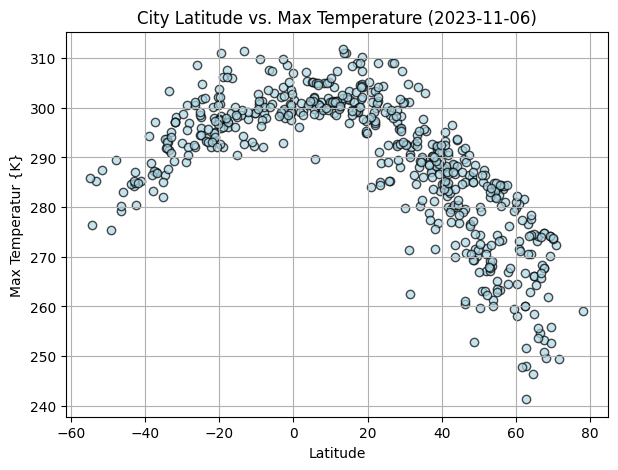

In [8]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='lightblue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
from datetime import datetime

plt.title(f'City Latitude vs. Max Temperature ({datetime.now().strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur {K}')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

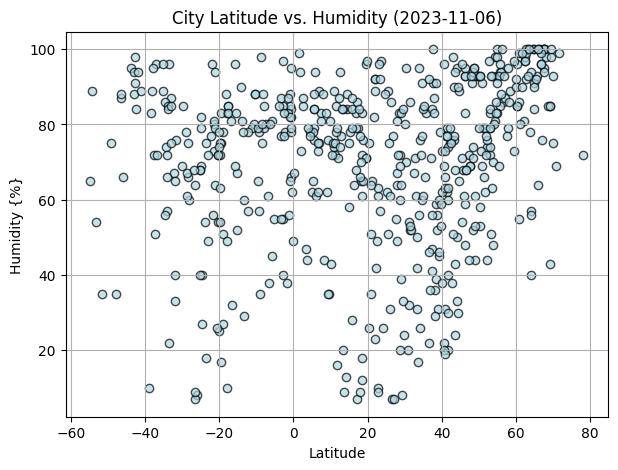

In [9]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='lightblue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
from datetime import datetime

plt.title(f'City Latitude vs. Humidity ({datetime.now().strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity {%}')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

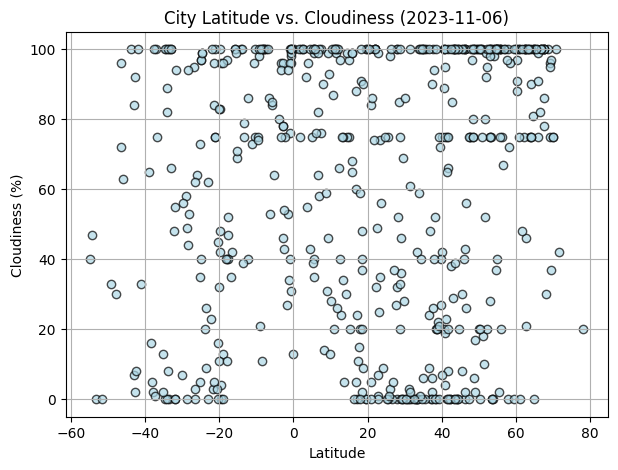

In [10]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='lightblue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
from datetime import datetime

plt.title(f'City Latitude vs. Cloudiness ({datetime.now().strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

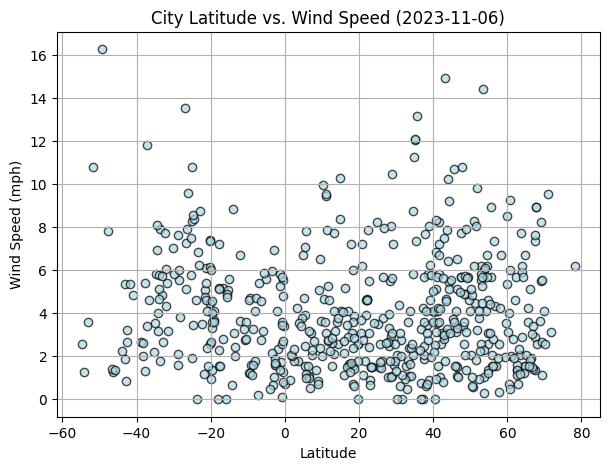

In [11]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='lightblue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
from datetime import datetime

plt.title(f'City Latitude vs. Wind Speed ({datetime.now().strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [3]:
def plot_LR(x, y, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err =linregress(x, y)
    
    print(f'The r-value is: {r_value}')
    
    regression_line = [(slope * xi) + intercept for xi in x]
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
    
    text = f'y = {round(slope,2)}x {"+" if intercept > 0 else "-"} {abs(round(intercept,2))}'
    plt.text((max(x)-min(x))*0.1+min(x), (max(y)-min(y))*0.1+min(y), text, color='red', horizontalalignment='left', verticalalignment='bottom')    

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df.Lat>=0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nantucket,41.2835,-70.0995,284.23,79,75,4.12,US,1699280295
3,tiksi,71.6872,128.8694,249.47,99,42,3.10,RU,1699280444
4,vorkuta,67.5000,64.0000,267.70,95,100,7.34,RU,1699280343
6,wailua homesteads,22.0669,-159.3780,296.59,92,100,4.63,US,1699280447
11,badger,64.8000,-147.5333,266.08,91,100,1.54,US,1699280453


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df.Lat<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,295.13,87,100,4.86,ZA,1699280180
2,edinburgh of the seven seas,-37.0676,-12.3116,287.08,96,100,11.79,SH,1699280443
5,adamstown,-25.0660,-130.1015,295.89,79,97,8.27,PN,1699280446
7,port-aux-francais,-49.3500,70.2167,275.37,75,33,16.26,TF,1699280449
8,grytviken,-54.2811,-36.5092,276.37,89,47,1.26,GS,1699280450


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8422233196868827


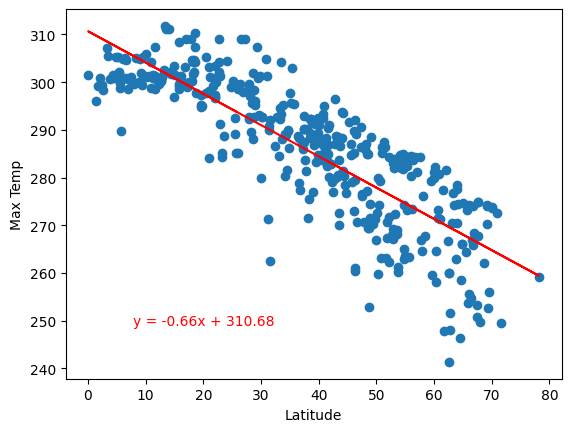

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df.Lat
y = northern_hemi_df['Max Temp']
plot_LR(x, y, 'Latitude', 'Max Temp')

The r-value is: 0.7259943200099266


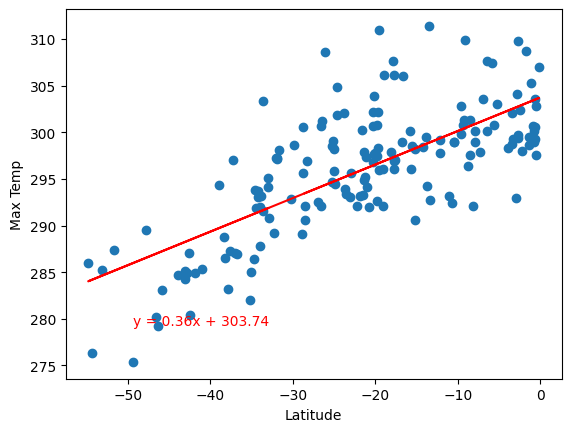

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df.Lat
y = southern_hemi_df['Max Temp']
plot_LR(x, y, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.28921828046141845


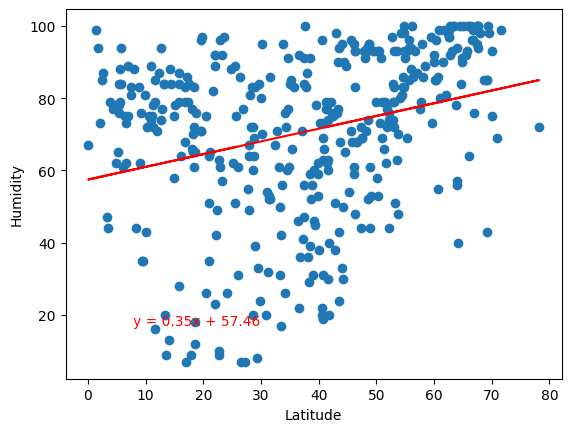

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df.Lat
y = northern_hemi_df['Humidity']
plot_LR(x, y, 'Latitude', 'Humidity')

The r-value is: 0.011911746200292993


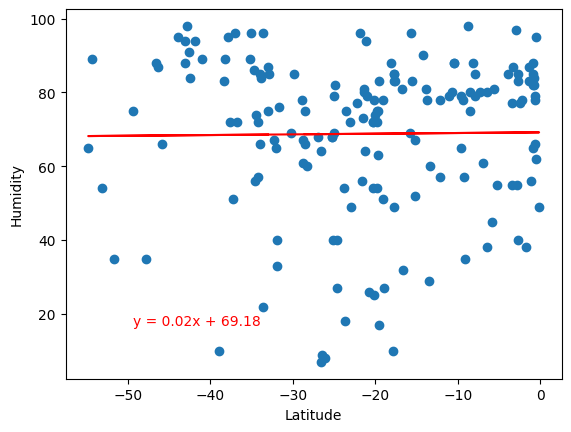

In [19]:
# southern_hemi_df Hemisphere
# YOUR CODE HERE
x = southern_hemi_df.Lat
y = southern_hemi_df['Humidity']
plot_LR(x, y, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.139618894453249


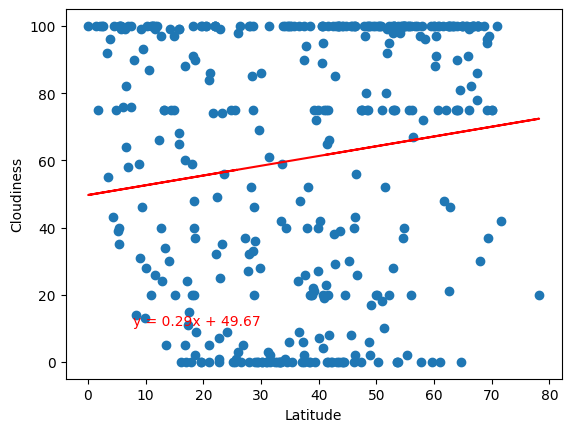

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df.Lat
y = northern_hemi_df['Cloudiness']
plot_LR(x, y, 'Latitude', 'Cloudiness')

The r-value is: 0.29907996937624426


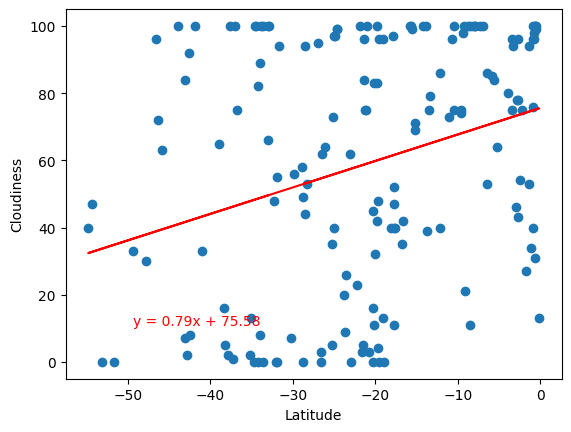

In [21]:
# YOUR CODE HERE
x = southern_hemi_df.Lat
y = southern_hemi_df['Cloudiness']
plot_LR(x, y, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11640931506443214


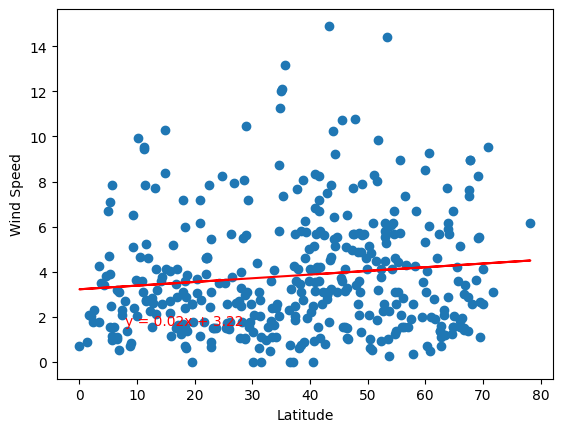

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df.Lat
y = northern_hemi_df['Wind Speed']
plot_LR(x, y, 'Latitude', 'Wind Speed')

The r-value is: -0.24504208976912184


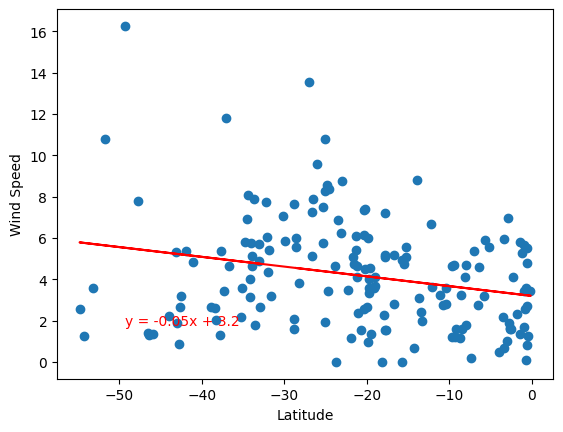

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df.Lat
y = southern_hemi_df['Wind Speed']
plot_LR(x, y, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 

- The linear regression is a good predictor of temp & lat, for both hemisphere, as expected.
- The slope in the temp & lat linear approximation is correctly relatited ith the sign of latitude.
- It seems that the linear regression is better approximation for the Noth Hemisphere, than the South one.
- For the rest of the targets, linear regression is a bad predictor as r-score states.
- Thew above affimation is valid for Noth and South hemisphere.